In [1]:
%pip install pyunfold

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:

from pyunfold import iterative_unfold
from pyunfold.callbacks import Logger

In [3]:

import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
sns.set_context(context='poster')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['lines.markeredgewidth'] = 2

In [5]:
num_samples = int(1e5)
true_samples = np.random.normal(loc=0.0, scale=1.0, size=num_samples)
true_samples

array([-0.41675785, -0.05626683, -2.1361961 , ...,  2.60578854,
       -0.21578792, -0.89995693])

In [6]:

bins = np.linspace(-3, 3, 21)
num_bins = len(bins) - 1

In [7]:
data_true, _ = np.histogram(true_samples, bins=bins)
data_true

array([  218,   478,   977,  1814,  3058,  4898,  6878,  9226, 10712,
       11782, 11789, 10814,  8886,  6892,  4759,  3013,  1804,  1009,
         497,   228])

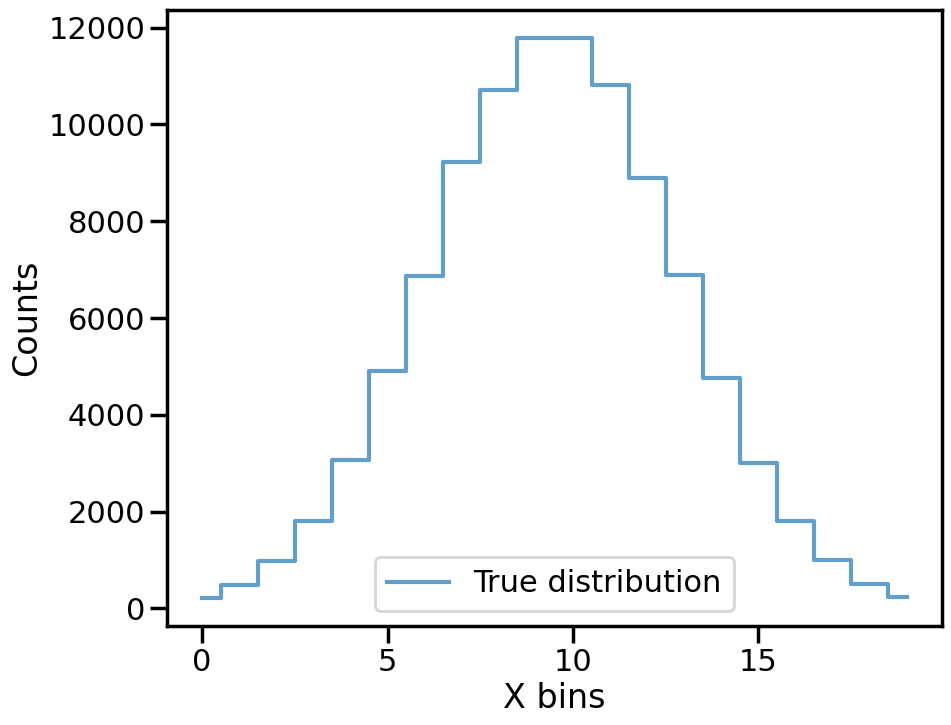

In [8]:
fig, ax = plt.subplots()
ax.step(np.arange(num_bins), data_true, where='mid', lw=3,
        alpha=0.7, label='True distribution')
ax.set(xlabel='X bins', ylabel='Counts')
ax.legend()
plt.show()

In [9]:
random_noise = np.random.normal(loc=0.3, scale=0.5, size=num_samples)
observed_samples = true_samples + random_noise

In [10]:

data_observed, _ = np.histogram(observed_samples, bins=bins)
data_observed

array([  201,   423,   805,  1409,  2361,  3546,  5203,  7122,  8360,
        9842, 10669, 10602,  9908,  8474,  6925,  5054,  3549,  2342,
        1454,   759])

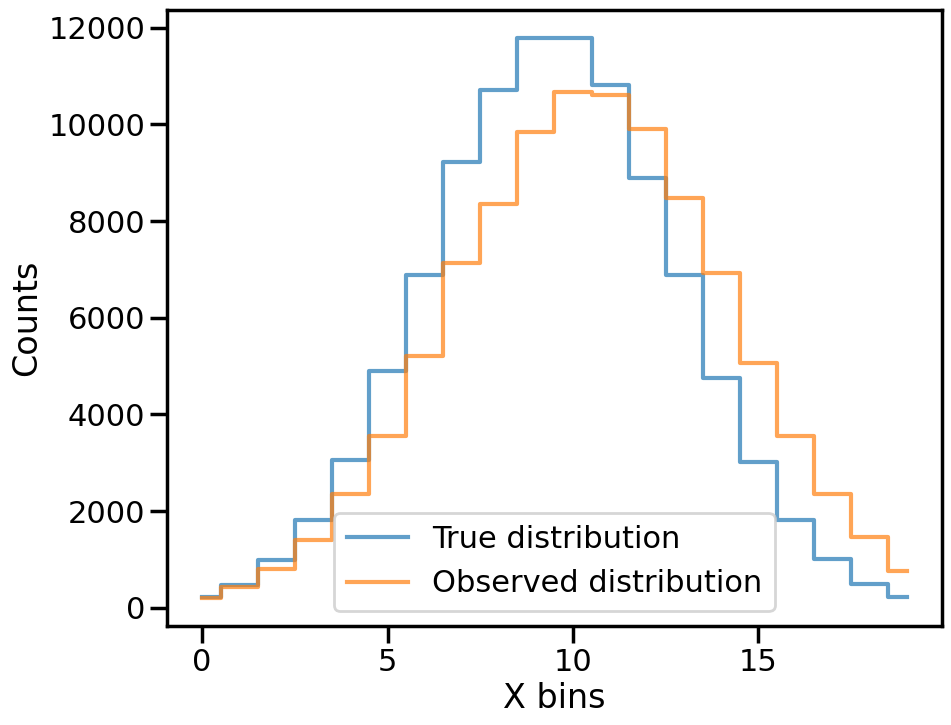

In [11]:

fig, ax = plt.subplots()
ax.step(np.arange(num_bins), data_true, where='mid', lw=3,
        alpha=0.7, label='True distribution')
ax.step(np.arange(num_bins), data_observed, where='mid', lw=3,
        alpha=0.7, label='Observed distribution')
ax.set(xlabel='X bins', ylabel='Counts')
ax.legend()
plt.show()

In [12]:
data_observed_err = np.sqrt(data_observed)
data_observed_err

array([ 14.17744688,  20.5669638 ,  28.37252192,  37.53664876,
        48.59012245,  59.54829972,  72.13182377,  84.39194274,
        91.43303561,  99.2068546 , 103.29085148, 102.96601381,
        99.53893711,  92.05433178,  83.21658489,  71.09149035,
        59.57348403,  48.39421453,  38.13135193,  27.54995463])

In [13]:
efficiencies = np.ones_like(data_observed, dtype=float)
efficiencies

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [14]:
efficiencies_err = np.full_like(efficiencies, 0.1, dtype=float)
efficiencies_err

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [15]:
response_hist, _, _ = np.histogram2d(observed_samples, true_samples, bins=bins)
response_hist_err = np.sqrt(response_hist)


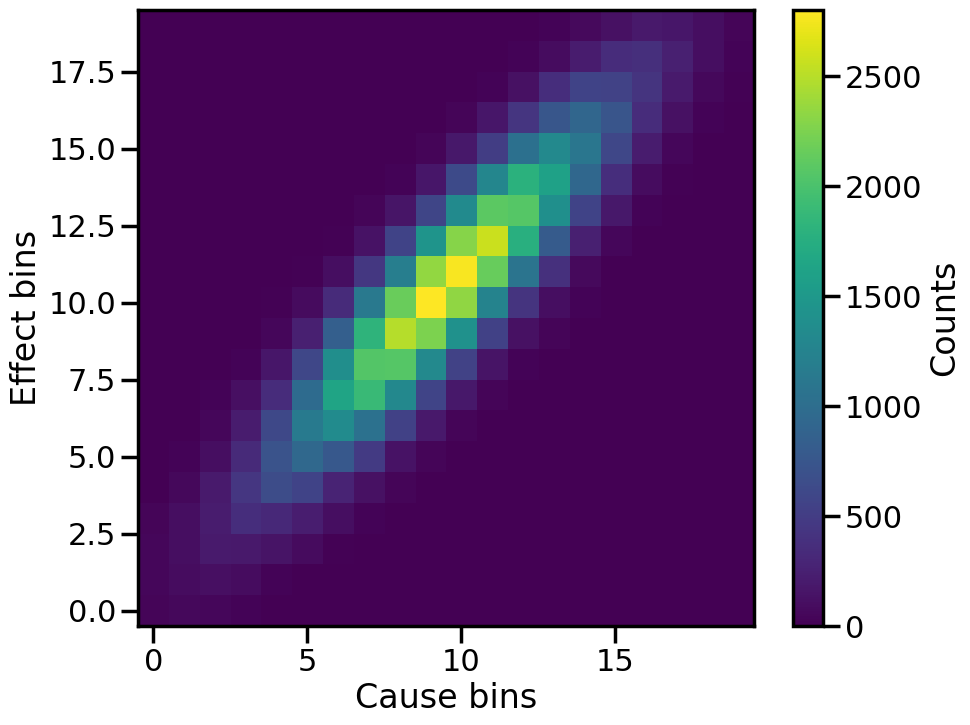

In [16]:

fig, ax = plt.subplots()
im = ax.imshow(response_hist, origin='lower')
cbar = plt.colorbar(im, label='Counts')
ax.set(xlabel='Cause bins', ylabel='Effect bins')
plt.show()

In [17]:
column_sums = response_hist.sum(axis=0)
normalization_factor = efficiencies / column_sums

In [18]:
response = response_hist * normalization_factor
response_err = response_hist_err * normalization_factor

In [19]:

response.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

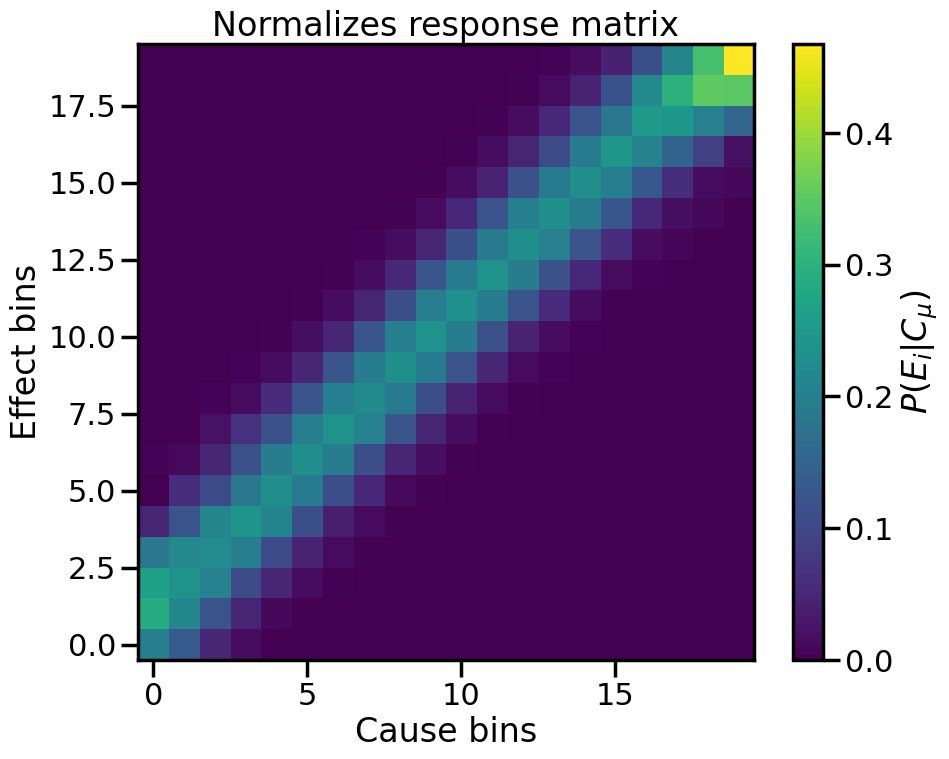

In [20]:
fig, ax = plt.subplots()
im = ax.imshow(response, origin='lower')
cbar = plt.colorbar(im, label='$P(E_i|C_{\mu})$')
ax.set(xlabel='Cause bins', ylabel='Effect bins',
       title='Normalizes response matrix')
plt.show()

In [28]:
unfolded_results = iterative_unfold(data=data_observed,
                                    data_err=data_observed_err,
                                    response=response,
                                    response_err=response_err,
                                    efficiencies=efficiencies,
                                    efficiencies_err=efficiencies_err,
                                    ts='chi2',
                                    callbacks=[Logger()])

Iteration 1: ts = 1038.4777, ts_stopping = 0.01
Iteration 2: ts = 90.4383, ts_stopping = 0.01
Iteration 3: ts = 11.3984, ts_stopping = 0.01
Iteration 4: ts = 1.8211, ts_stopping = 0.01
Iteration 5: ts = 0.3695, ts_stopping = 0.01
Iteration 6: ts = 0.1075, ts_stopping = 0.01
Iteration 7: ts = 0.0468, ts_stopping = 0.01
Iteration 8: ts = 0.0266, ts_stopping = 0.01
Iteration 9: ts = 0.0172, ts_stopping = 0.01
Iteration 10: ts = 0.0120, ts_stopping = 0.01
Iteration 11: ts = 0.0087, ts_stopping = 0.01


In [29]:
unfolded_results['unfolded']

array([  282.5897635 ,   471.07517673,   920.41932086,  1766.35609321,
        3070.21741032,  4878.29582591,  7048.77499786,  9040.35446256,
       10773.4028152 , 11767.66814105, 11732.55449242, 10760.35992985,
        9055.47611275,  6975.8538456 ,  4744.53761011,  2897.28384577,
        1440.72349544,   758.9002543 ,   395.45123261,   227.70517392])

In [30]:
unfolded_results['sys_err']

array([ 74.6399814 ,  80.4900527 , 150.22960707, 270.98496154,
       418.95914981, 547.18959598, 720.25383964, 803.92237158,
       934.45343304, 975.05264122, 945.12265755, 932.54848762,
       827.51411831, 697.4370986 , 562.9584915 , 413.21073778,
       237.04734243, 144.75208513,  97.68485117,  79.48481667])

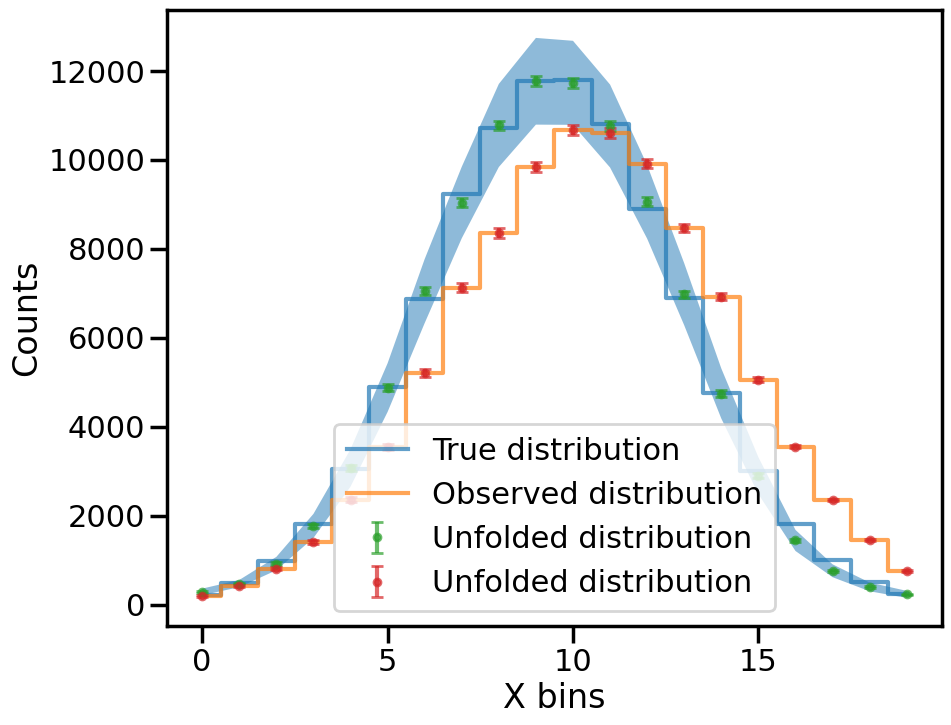

In [31]:
fig, ax = plt.subplots()
ax.step(np.arange(num_bins), data_true, where='mid', lw=3,
        alpha=0.7, label='True distribution')
ax.step(np.arange(num_bins), data_observed, where='mid', lw=3,
        alpha=0.7, label='Observed distribution')
ax.errorbar(np.arange(num_bins), unfolded_results['unfolded'],
            yerr=unfolded_results['stat_err'],
            alpha=0.7,
            elinewidth=3,
            capsize=4,
            ls='None', marker='.', ms=10,
            label='Unfolded distribution')
ax.errorbar(np.arange(num_bins), data_observed,
            yerr=unfolded_results['stat_err'],
            alpha=0.7,
            elinewidth=3,
            capsize=4,
            ls='None', marker='.', ms=10,
            label='Unfolded distribution')
ax.fill_between(np.arange(num_bins), unfolded_results['unfolded']-unfolded_results['sys_err'], unfolded_results['unfolded']+unfolded_results['sys_err'], alpha=0.5)

ax.set(xlabel='X bins', ylabel='Counts')
plt.legend()
plt.show()

In [33]:
# I want to add a widget that lets me scale the errors of the response matrix and unfold and plot as above 

from ipywidgets import interact

In [36]:
def unfold_and_plot(data_err_factor=1.0, resp_err_factor=1.0, eff_err_factor=1.0):
    unfolded_results = iterative_unfold(data=data_observed,
                                    data_err=data_observed_err*data_err_factor,
                                    response=response,
                                    response_err=response_err*resp_err_factor,
                                    efficiencies=efficiencies,
                                    efficiencies_err=efficiencies_err*eff_err_factor,
                                    ts='chi2',
                                    callbacks=[Logger()])
    fig, ax = plt.subplots()
    ax.step(np.arange(num_bins), data_true, where='mid', lw=3,
            alpha=0.7, label='True distribution')
    ax.step(np.arange(num_bins), data_observed, where='mid', lw=3,
            alpha=0.7, label='Observed distribution')
    ax.errorbar(np.arange(num_bins), unfolded_results['unfolded'],
                yerr=unfolded_results['stat_err'],
                alpha=0.7,
                elinewidth=3,
                capsize=4,
                ls='None', marker='.', ms=10,
                label='Unfolded distribution')
    ax.errorbar(np.arange(num_bins), data_observed,
                yerr=data_observed_err*data_err_factor,
                alpha=0.7,
                elinewidth=3,
                capsize=4,
                ls='None', marker='.', ms=10,
                label='Unfolded distribution')
    ax.fill_between(np.arange(num_bins), unfolded_results['unfolded']-unfolded_results['sys_err'], unfolded_results['unfolded']+unfolded_results['sys_err'], alpha=0.5)

    ax.set(xlabel='X bins', ylabel='Counts')
    plt.legend()
    plt.show()

In [41]:
interact(unfold_and_plot, data_err_factor=(0.0, 10.0,0.1), resp_err_factor=(0.0, 10.0,0.1), eff_err_factor=(0.0, 10.0,0.1))

interactive(children=(FloatSlider(value=1.0, description='data_err_factor', max=10.0), FloatSlider(value=1.0, …

<function __main__.unfold_and_plot(data_err_factor=1.0, resp_err_factor=1.0, eff_err_factor=1.0)>